# Wildfires

This notebook uses cellular automata to model the spread of a wildfire.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import random as rand

## the packages below are used to create an animation as a mp4 file and display it in the notebook
from IPython.display import HTML
from mplEasyAnimate import animation
from tqdm import tqdm
from base64 import b64encode

Define an array for the wildfire.

- 0 is no tree
- 1 is a tree not on fire
- 2 is a tree on fire

In [2]:
# create cellular automata
# 2D array; columns represent the cells; each row is an iteration
n = 6 #number of cells in a row
automata = np.zeros((n, n), dtype=int)

seed = [[2,2,0,0],
          [2,2,0,0],
          [0,0,1,1],
          [0,0,1,1]]

automata[1:5,1:5] = seed

print(automata)

[[0 0 0 0 0 0]
 [0 2 2 0 0 0]
 [0 2 2 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]


Visualize the array as a grid.

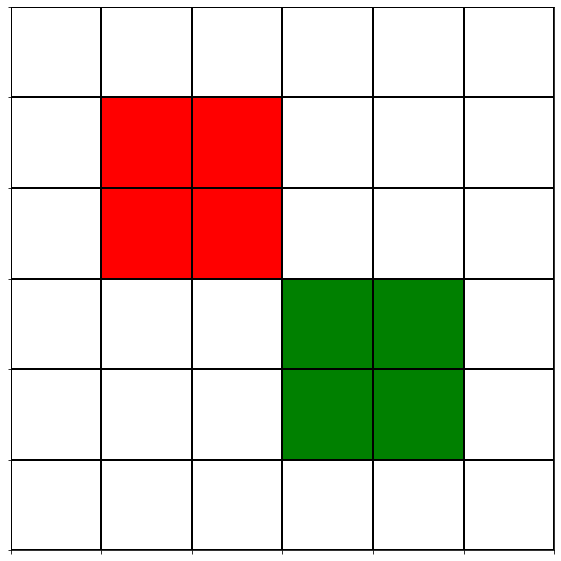

In [19]:
cmap = colors.ListedColormap(['white', 'green', 'red'])
bounds = [0, 1, 2, 3]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(10,10))

frame = plt.gca()
frame.axes.set_xticks(np.arange(-0.5, n+0.5, 1))
frame.axes.set_yticks(np.arange(-0.5, n+0.5, 1))
frame.set_yticklabels([])
frame.set_xticklabels([])
frame.axes.grid(True, which='major', axis='both', color='k', linestyle='-', linewidth=2)

plt.imshow(automata, interpolation='nearest', cmap=cmap, norm=norm, aspect='equal')


Define a function that applies rules to each cell and changes the cells.

In [3]:
def applyrules(i, j): #i and j are the row and column
  global future_automata

  probImmune = 0.2   #probability of immunity from catching fire 

  #check neighbors
  if i==0 and j==0: #top, left corner
    North = automata[- 1, j]
    South = automata[i + 1, j]
    East = automata[i, j + 1]
    West = automata[i, - 1]
  elif i==0 and j==np.shape(automata)[1]-1: #top, right corner
    North = automata[- 1, j]
    South = automata[i + 1, j]
    East = automata[i, 0]
    West = automata[i, j - 1]
  elif i==np.shape(automata)[0]-1 and j==0: #bottom, left corner
    North = automata[i - 1, j]
    South = automata[0, j]
    East = automata[i, j + 1]
    West = automata[i, - 1]
  elif i==np.shape(automata)[0]-1 and j==np.shape(automata)[1]-1: #bottom, right corner
    North = automata[i - 1, j]
    South = automata[0, j]
    East = automata[i, 0]
    West = automata[i, j - 1]
  elif i==0: #top row
    North = automata[- 1, j]
    South = automata[i + 1, j]
    East = automata[i, j + 1]
    West = automata[i, j - 1]
  elif i==np.shape(automata)[0]-1: #last row
    North = automata[i - 1, j]
    South = automata[0, j]
    East = automata[i, j + 1]
    West = automata[i, j - 1]
  elif j==0: #left column
    North = automata[i - 1, j]
    South = automata[i + 1, j]
    East = automata[i, j + 1]
    West = automata[i, - 1]
  elif j==np.shape(automata)[1]-1: #right column
    North = automata[i - 1, j]
    South = automata[i + 1, j]
    East = automata[i, 0]
    West = automata[i, j - 1]
  else: #all other cells in the middle of the grid
    North = automata[i - 1, j]
    South = automata[i + 1, j]
    East = automata[i, j + 1]
    West = automata[i, j - 1]

  if automata[i,j] == 0 or automata[i,j] == 2: #if cell is empty or burning...
      future_automata[i,j] = 0   #future cell stays empty or tree burns down (becomes empty)
        
  elif automata[i,j] == 1 and ((North == 2) or (East == 2) or (South == 2) or (West == 2)):  #if cell is a tree and any of its neighbors are burning...
    r = rand.random()
    if r < probImmune:   
      future_automata[i,j] = 1   #cell set to TREE
    else: 
      future_automata[i,j] = 2   #cell set to BURNING
  else: 
    future_automata[i,j] = 1   #cell set to TREE

Define a function to iterate the model by applying the rules to the cells.

In [4]:
def iterate():
  global automata, future_automata #allows to change automata

  # Create an identical copy of the universe, which will be the next generation.
  future_automata = np.copy(automata)

  # loop through every cell
  for i in range(np.shape(automata)[0]):
    for j in range(np.shape(automata)[1]):
      applyrules(i,j) #apply rules to a cell
  
  automata = np.copy(future_automata)

Define a function to visualize the grid.

In [ ]:
def showAutomata():
  cmap = colors.ListedColormap(['white', 'green', 'red'])
  bounds = [0, 1, 2, 3]
  norm = colors.BoundaryNorm(bounds, cmap.N)

  fig = plt.figure(figsize=(10,10))

  frame = plt.gca()
  frame.axes.set_xticks(np.arange(-0.5, n+0.5, 1))
  frame.axes.set_yticks(np.arange(-0.5, n+0.5, 1))
  frame.set_yticklabels([])
  frame.set_xticklabels([])
  frame.axes.grid(True, which='major', axis='both', color='k', linestyle='-', linewidth=2)

  plt.imshow(automata, interpolation='nearest', cmap=cmap, norm=norm, aspect='equal')

Define a function to create an animation.

In [5]:
def animAutomata(filename, N):
    global automata
    cmap = colors.ListedColormap(['white', 'green', 'red'])
    bounds = [0, 1, 2, 3]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    with animation(filename, dpi=30) as anim:
        t_offsets = np.arange(Niterations+1)
        i=0
        for offset in tqdm(t_offsets):

            #iterate the automata
            if i>0:
                iterate()

            fig = plt.figure(figsize=(10,10))
            ax = fig.gca()
            ax.set_xticks(np.arange(-0.5, n+0.5, 1))
            ax.set_yticks(np.arange(-0.5, n+0.5, 1))
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.grid(True, which='major', axis='both', color='k', linestyle='-', linewidth=2)
            plt.imshow(automata, interpolation='nearest', cmap=cmap, norm=norm, aspect='equal')
            anim.add_frame(fig)
            plt.close(fig)
            i=i+1

## The Model

The steps are:

1. create the array of automata
1. populate the automata with trees and fire (the initial condition)
1. write a loop
2. interate the model
3. create an animation

In [6]:
# create cellular automata
# 2D array
n = 50 #number of cells in a row
automata = np.zeros((n, n), dtype=int)
future_automata = np.copy(automata) #initialize future_automata
probTree = 0.7 #probability of a cell being a tree (assigned a value of 1)

for i in range(np.shape(automata)[0]):
  for j in range(np.shape(automata)[1]):
    r = rand.random()
    if r < probTree:
      automata[i,j] = 1 #tree
    else:
      automata[i,j] = 0 #empty

    automata[25,25] = 2

#run simulation and animate
filename = 'random.mp4'
Niterations = 150
animAutomata(filename, Niterations)

#display animation
mp4 = open(filename,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

100%|██████████| 151/151 [00:41<00:00,  3.68it/s]
